# Time spectral analysis

* Purpose: Demo how to look at time spectral characteristics of SSH in daily data from OCCIPUT , ORCA12 and AVISO.
* Goal in the 3DA context: compare the spectral content of the reconstructed SSH by AnDA and OI to the Truth: __Does AnDA do better than OI in the high frequencies?__
* stephanie.leroux@ocean-next.fr



In [2]:
## standart libraries
import os,sys,glob
import numpy as np
import numpy.ma as ma

# xarray
import xarray as xr

# matplotlib
import matplotlib.pyplot as plt
    
# Guillaume Serazin's XSCALE package: https://github.com/serazing/xscale
# See the doc on the fft function and normalizations here: https://xscale.readthedocs.io/en/latest/fft.html
import xscale.spectral.fft as xfft
from xscale.spectral.tools import plot_spectrum
import xscale.signal.generator as xgen

# My custom module with plot tools for geographical maps
import utils_SLX_plots_onw as slx 

# My custom module dealing with data on the MEOM server
import SLX_tools as slxtools

/home/lerouste/.conda/envs/py36_steph_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Read data :

* Read from datasets on the MEOM server

In [3]:
SSH_occi,nav_lon_occi,nav_lat_occi = slxtools.readOCCIPUTmb1()

SSH_orca12,nav_lon_orca12,nav_lat_orca12 = slxtools.readORCA12()

SSH_aviso,lon_aviso,lat_aviso = slxtools.readAVISO()

* Select 2004 data only, and __center the data by removing mean__

_Note: The SSH simulated in the model is relative, so it is not necessarily  centered exactly on the same zero from one simulation to another. A quick fix to deal with this aspect is that you can remove the time-space mean of the SSH from OCCIPUT and from ORCA12 before performing your analysis._

In [4]:
SSH_occi_c   = SSH_occi.sel(time_counter='2004') - SSH_occi.sel(time_counter='2004').mean()

SSH_orca12_c = SSH_orca12.sel(time_counter='2004') - SSH_orca12.sel(time_counter='2004').mean()

SSH_aviso_c  = SSH_aviso - SSH_aviso.mean() 

# Define boundaries for the zoom region

* Define boundaries:

In [5]:
lonlatbounds=  np.zeros((1, 4))  # lonmin,lonmax,latmin,latmax 

# Here: entire Gulf of Mexico
lonlatbounds[0,0] = -99.
lonlatbounds[0,1] = -81.9
lonlatbounds[0,2] = 18.
lonlatbounds[0,3] = 31.

* Initialize my general plot settings 

In [6]:
# my general plot settings for 3da
glo,xlim,ylim,coastL,coastC,coastLand,\
typlo,vmin,vmax,Nincr,su,so,\
labelplt,Nbar,pltty,dpifig,diro = slxtools.myGMexPlotsettings()

# colormap
cm_base='viridis'

* Plot the variance from the 3 datasets

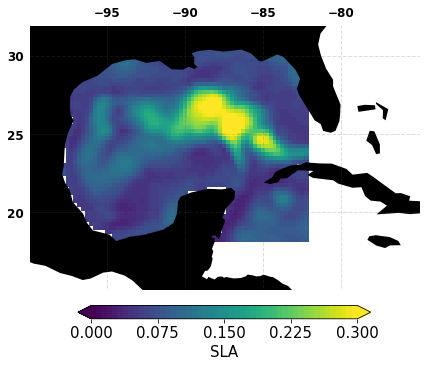

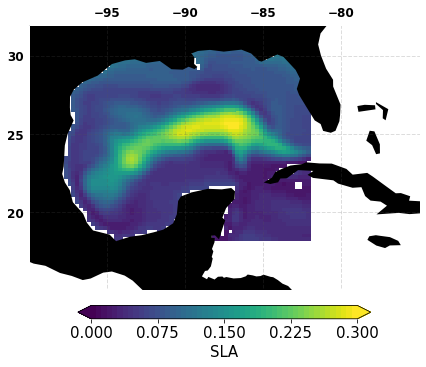

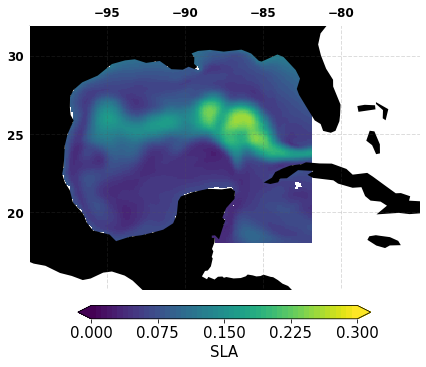

In [7]:

regna="GMex"
ireg=0
            
# loop on the 3 datasets:
for dataset in ('aviso','occi','orca12'): 

        lonswitch = 0.

        if dataset=='occi':
            # apply to occiput data
            nav_lati = nav_lat_occi
            nav_loni = nav_lon_occi
            SSHi     = SSH_occi_c

        if dataset=='orca12':
            # apply to occiput data
            nav_lati = nav_lat_orca12
            nav_loni = nav_lon_orca12
            SSHi     = SSH_orca12_c

        if dataset=='aviso':
            # apply to occiput data
            nav_lati = SSH_aviso_c.lat
            nav_loni = SSH_aviso_c.lon
            SSHi     = SSH_aviso_c
            lonswitch = 360.  # this is for later conversion of the longitudes in right format

        if dataset=='aviso':  
            timena = 'time'
        else:
            timena = 'time_counter' 

        # ============= 
        # Extract subregion
        reg, nav_lat, nav_lon  = slxtools.extractsubreg(lonswitch+lonlatbounds[ireg,0],lonswitch+lonlatbounds[ireg,1],lonlatbounds[ireg,2],lonlatbounds[ireg,3],nav_loni,nav_lati,SSHi)


        # data to plot 
        data2plot  = reg.std(dim=timena).squeeze()

        # output plot file name including the time index
        plto = dataset+"_"+regna+"_SLA_VARMAP"

        # min/max values
        vmin=0.
        vmax=0.3

        #----------------------------------------------------
        #------ PLOT ----------------------------------------
        #----------------------------------------------------

        # create fig
        fig3 = plt.figure(figsize=([7,7]),facecolor='white')

        # plot data (base plot from plotmap function defined im my library)
        cs = slx.plotmap(fig3,data2plot,nav_lon.values,nav_lat.values,plto,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,coastC=coastC,incrgridlon=5,incrgridlat=5,su=su,so=so,xlim=xlim,ylim=ylim,typlo=typlo,Nbar=Nbar,labelplt=labelplt)

        # display plot
        plt.show()

        # Save fig in png, resolution dpi
        fig3.savefig(diro+"/"+plto+'.png', facecolor=fig3.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

        # close fig
        plt.close(fig3)       

# FFT decomposition and Power Spectral Density computation
Using [Guillaume Serazin's xscale package](https://github.com/serazing/xscale).
See the [doc on the fft function and normalizations here.](https://xscale.readthedocs.io/en/latest/fft.html)

/home/lerouste/.conda/envs/py36_steph_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/lerouste/.conda/envs/py36_steph_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/lerouste/.conda/envs/py36_steph_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/lerouste/.conda/envs/py36_steph_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/lerouste/.conda/envs/py36_steph_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/lerouste/.conda/envs/py36_steph_env/lib/python3.6/site-pa

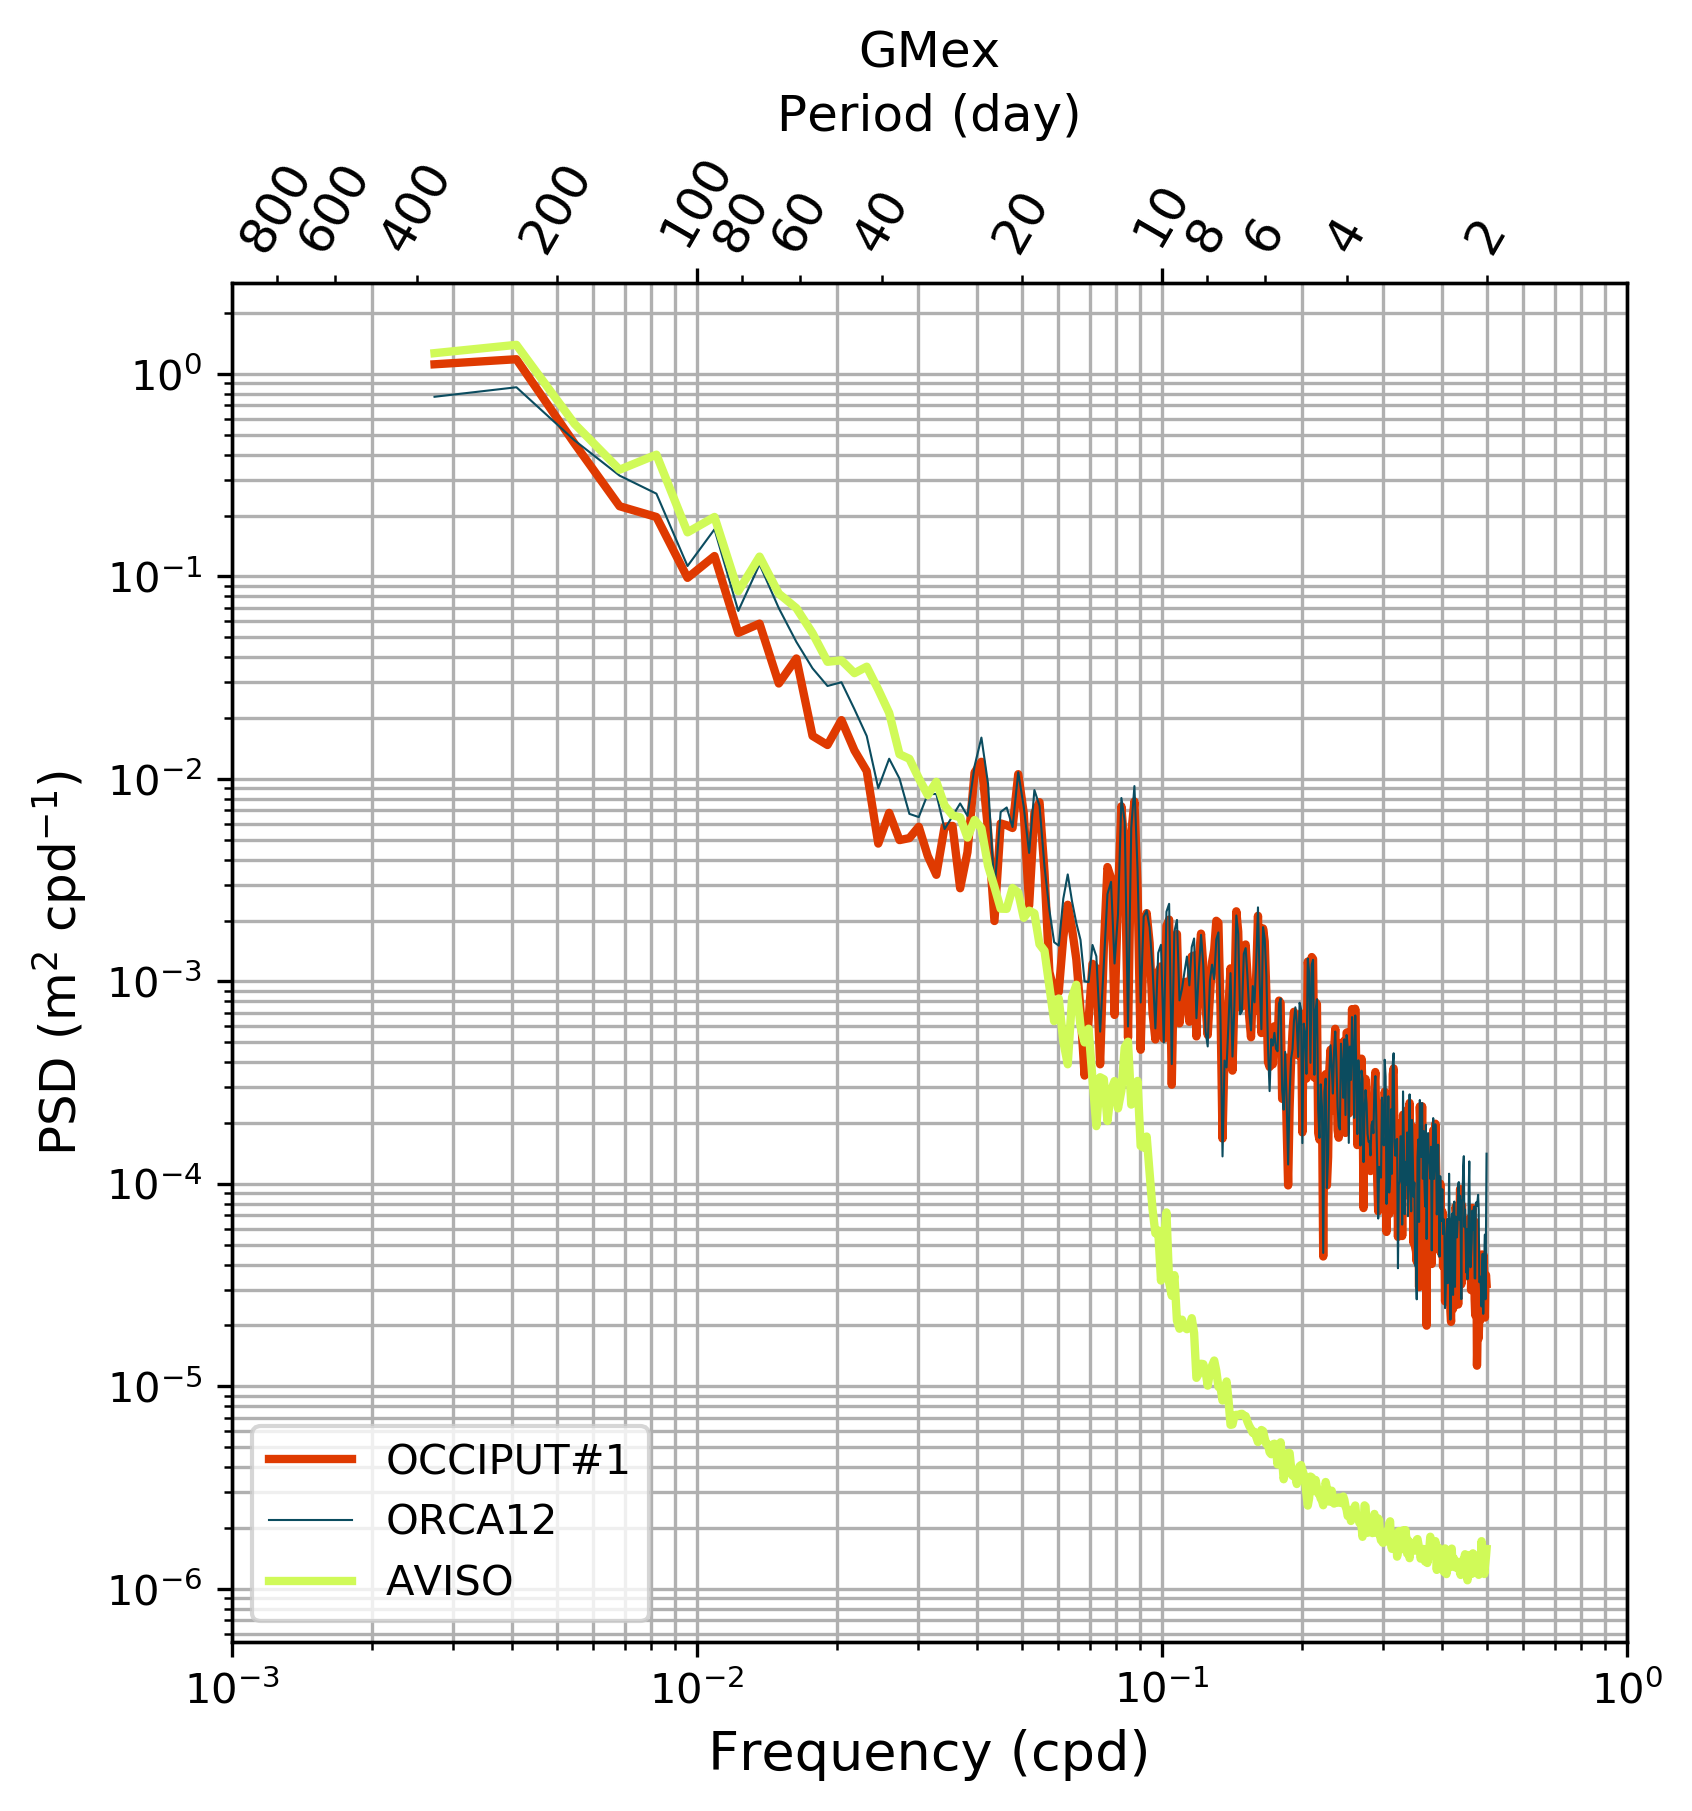

In [8]:
# padding: the fft is performed on a window of length NPADDING*seglen 
# where seglen is the actual length of the data and padded with zeros on both ends
NPADDING = 2


ireg=0
regna="GMex"

# loop on the 3 datasets:
for dataset in ('aviso','occi','orca12'): 

        lonswitch = 0.

        if dataset=='occi':
            # apply to occiput data
            nav_lati = nav_lat_occi
            nav_loni = nav_lon_occi
            SSHi     = SSH_occi_c

        if dataset=='orca12':
            # apply to occiput data
            nav_lati = nav_lat_orca12
            nav_loni = nav_lon_orca12
            SSHi     = SSH_orca12_c

        if dataset=='aviso':
            # apply to occiput data
            nav_lati = SSH_aviso_c.lat
            nav_loni = SSH_aviso_c.lon
            SSHi     = SSH_aviso_c
            lonswitch = 360.  # this is for later conversion of the longitudes in right format

        # ============= 
        # Extract subregion
        reg, nav_lat, nav_lon  = slxtools.extractsubreg(lonswitch+lonlatbounds[ireg,0],lonswitch+lonlatbounds[ireg,1],lonlatbounds[ireg,2],lonlatbounds[ireg,3],nav_loni,nav_lati,SSHi)

        # name of the time coordinate
        if dataset=='aviso':  
            timena = 'time'
        else:
            timena = 'time_counter' 


        # ============= 
        # Use GS's package to perform fft decomposition on the time dimension
        SPtime = xfft.fft(reg, dim=timena, dx=1., detrend='mean',nfft=reg.shape[0]*NPADDING,tapering=True)

        # ============= 
        # Compute PSD from fft coeff, and then average over x and y
        if dataset=='aviso':
            MEANPSD  = xfft.psd(SPtime).mean(dim='lon').mean(dim='lat').load()
        else:
            MEANPSD  = xfft.psd(SPtime).mean(dim='x').mean(dim='y').load() 

        # ============= 
        # store resulting PSD for each dataset
        if dataset=='aviso':
            MEANPSD_aviso  = MEANPSD
        if dataset=='occi':
            MEANPSD_occi   = MEANPSD
        if dataset=='orca12':
            MEANPSD_orca12 = MEANPSD

            
            
# PLOT

# read frequencies and drop 0
freqs = MEANPSD_occi.f_time_counter.values
freqs = freqs[NPADDING::] 

# x axis limits: (must be power exponents of 10 : xaxis from 10 ** xmin to x ** xmax )
xmin=-3
xmax=0

title=regna

fig = plt.figure(figsize=(6, 6), dpi=dpifig,facecolor='white')
ax = slxtools.plotSP(freqs,MEANPSD_occi[NPADDING::],xmin,xmax,sp2=MEANPSD_orca12[NPADDING::],sp3= MEANPSD_aviso[NPADDING::],ti1="OCCIPUT#1",ti2="ORCA12",ti3="AVISO",title=title)
plt.show()
plt.close('all')  
        

* NOTE: Coherence spectrum would be an interesting next step to do with the reconstructed SSH from AnDA and OI to see how much coherent they are with the TRUTH on the different frequency ranges. See for example [scipy.signal.coherence.html](see https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.coherence.html)